In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

C:\ProgramData\Miniconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
train = pd.read_csv('train.csv', header = 0).set_index('id', drop = False)
test = pd.read_csv('test.csv', header = 0).set_index('id', drop = False)

train.timestamp = pd.to_datetime(train.timestamp)
test.timestamp = pd.to_datetime(test.timestamp)

print "train ", train.shape
print "test ", test.shape

print "min train timestamp ", min(train.timestamp)
print "max train timestamp ", max(train.timestamp)
print "min test timestamp ", min(test.timestamp)
print "max test timestamp ", max(test.timestamp)

train  (30471, 292)
test  (7662, 291)
min train timestamp  2011-08-20 00:00:00
max train timestamp  2015-06-30 00:00:00
min test timestamp  2015-07-01 00:00:00
max test timestamp  2016-05-30 00:00:00


In [3]:
df_fixup = pd.read_csv('BAD_ADDRESS_FIX.csv', sep = ';', header = 0).set_index('id', drop = True)

upd_index_train = df_fixup.index[df_fixup.index <= train.index.max()]
upd_index_test = df_fixup.index[df_fixup.index >= test.index.min()]

print upd_index_train.shape, upd_index_test.shape

for col in df_fixup.columns:
    train.loc[upd_index_train, col] = df_fixup.loc[upd_index_train, col]
    test.loc[upd_index_test, col] = df_fixup.loc[upd_index_test, col]

(550L,) (149L,)


### full_sq

In [4]:
print train.loc[train['full_sq'] == 0, 'full_sq'].shape
print train.loc[train['full_sq'] == 1, 'full_sq'].shape
print test.loc[test['full_sq'] == 0, 'full_sq'].shape
print test.loc[test['full_sq'] == 1, 'full_sq'].shape
print train.loc[train['full_sq'].isnull(), 'full_sq'].shape
print test.loc[test['full_sq'].isnull(), 'full_sq'].shape

(2L,)
(24L,)
(1L,)
(1L,)
(0L,)
(0L,)


In [5]:
ind = train[(train['full_sq'] == 0) | (train['full_sq'] == 1)].index
train.loc[ind, 'full_sq'] = train.loc[ind, 'life_sq']
train.loc[(train['full_sq'] == 0) | (train['full_sq'] == 1), 'full_sq'] = np.NaN

ind = test[(test['full_sq'] == 0) | (test['full_sq'] == 1)].index
test.loc[ind, 'full_sq'] = test.loc[ind, 'life_sq']

In [121]:
train.loc[train['full_sq'].isnull(), ['id', 'timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

,id,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,,
6115,6115,2013-02-22,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Poselenie Voskresenskoe,OwnerOccupier,NaN,NaN,5177040
16292,16292,2014-03-20,NaN,1.0,1.0,1.0,1.0,1.0,1.0,Poselenie Voskresenskoe,OwnerOccupier,3.0,4.0,4457400
16741,16741,2014-03-31,NaN,1.0,1.0,1.0,1.0,1.0,1.0,Poselenie Voskresenskoe,OwnerOccupier,3.0,4.0,7820575
17197,17197,2014-04-09,NaN,1.0,1.0,1.0,1.0,1.0,1.0,Pokrovskoe Streshnevo,OwnerOccupier,1.0,1.0,13066000
17935,17935,2014-04-28,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Poselenie Voskresenskoe,OwnerOccupier,1.0,1.0,4425000
18603,18603,2014-05-19,NaN,1.0,1.0,1.0,1.0,1.0,1.0,Poselenie Voskresenskoe,OwnerOccupier,3.0,1.0,6675730
22174,22174,2014-09-03,NaN,1.0,1.0,1.0,1.0,1.0,1.0,Poselenie Vnukovskoe,OwnerOccupier,1.0,1.0,6256186
22725,22725,2014-09-20,NaN,1.0,1.0,1.0,1.0,25.0,2014.0,Nekrasovka,OwnerOccupier,1.0,1.0,4740000
22798,22798,2014-09-23,NaN,1.0,1.0,3.0,7.0,19.0,2015.0,Poselenie Shherbinka,OwnerOccupier,1.0,1.0,5591788


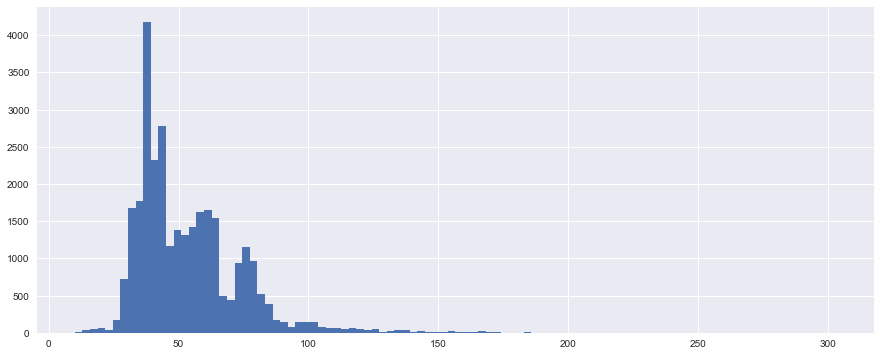

In [16]:
plt.figure(figsize=(15, 6))
train.full_sq.hist(bins = 100)

In [90]:
ind = train[(train.full_sq > 100) & (train.full_sq/train.life_sq > 3.5) & (train.life_sq > 1)].index
train.loc[ind, ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]


,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,


In [6]:
train.loc[train.full_sq == 353.0, 'full_sq'] = 35.3
train.loc[train.full_sq == 394.0, 'full_sq'] = 39.4
train.loc[train.full_sq == 412.0, 'full_sq'] = 41.2
train.loc[train.full_sq == 729.0, 'full_sq'] = 72.9
train.loc[train.full_sq == 5326.0, 'full_sq'] = 53.26
train.loc[train.full_sq == 634.0, 'full_sq'] = 63.4
train.loc[train.full_sq == 461.0, 'full_sq'] = 46.1

In [136]:
train.loc[(train.full_sq > 303), ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,


In [135]:
train.loc[(train.full_sq <= 10), ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,
3911,2012-09-27,10.0,10.0,NaN,NaN,5.0,NaN,NaN,Otradnoe,Investment,NaN,NaN,2150000


In [7]:
train.loc[train.full_sq == 325.0, 'full_sq'] = 32.5
train.loc[train.full_sq == 388.0, 'full_sq'] = 38.8
train.loc[train.full_sq == 637.0, 'full_sq'] = 63.7
train.loc[train.full_sq == 603.0, 'full_sq'] = 60.3
train.loc[train.full_sq == 407.0, 'full_sq'] = 40.7

train.loc[train.full_sq <= 10, 'full_sq'] = train.loc[train.full_sq <= 10, 'life_sq']

In [134]:
ind = test[(test.full_sq > 100) & (test.full_sq/test.life_sq > 3) & (test.life_sq > 1)].index
test.loc[ind, ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,


In [133]:
test.loc[(test.full_sq > 200) & ((test.full_sq/test.life_sq > 3) | (test.life_sq == test.full_sq)), ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,


In [132]:
test.loc[(test.full_sq < 10), ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,


In [8]:
test.loc[test.full_sq == 403.0, 'full_sq'] = 40.3
test.loc[test.full_sq == 232.7, 'full_sq'] = np.NaN

test.loc[test.full_sq < 10, 'full_sq'] = np.NaN

In [9]:
train.loc[train.id == 20165, 'full_sq'] = 76.0

### life_sq

In [272]:
#исправляем ошибки на основании этих данных:
train.loc[train['full_sq'] == train['life_sq'], 'life_sq'] = 0

In [ ]:
##????????
train.loc[train['id'] == 129, 'life_sq'] = 32
train.loc[train['id'] == 1085, 'life_sq'] = 28
train.loc[train['id'] == 1866, 'life_sq'] = 18
train.loc[train['id'] == 4388, 'life_sq'] = 42.6
train.loc[train['id'] == 9240, 'life_sq'] = 30.1
train.loc[train['id'] == 9259, 'life_sq'] = 45.8
train.loc[train['id'] == 13549, 'life_sq'] = 74
train.loc[train['id'] == 13632, 'life_sq'] = 26
train.loc[train['id'] == 13800, 'life_sq'] = 16
train.loc[train['id'] == 26345, 'life_sq'] = 43.5
train.loc[train['id'] == 21083, 'life_sq'] = 34.9
train.loc[train['id'] == 22788, 'life_sq'] = 53
train.loc[train['id'] == 27796, 'life_sq'] = 30
train.loc[train['id'] == 29305, 'life_sq'] = 51
train.loc[train['id'] == 24431, 'life_sq'] = 73
train.loc[train['id'] == 22807, 'life_sq'] = 53
train.loc[train['id'] == 22614, 'life_sq'] = 36
train.loc[train['id'] == 20675, 'life_sq'] = 43
train.loc[train['id'] == 9649, 'life_sq'] = 80
train.loc[train['id'] == 7211, 'life_sq'] = 19.5
train.loc[train['id'] == 6339, 'life_sq'] = 19.1

In [274]:
test.loc[test['full_sq'] == test['life_sq'], 'life_sq'] = 0

In [204]:
#full_sq не должна быть меньше life_sq, смотрим, где это не выполняется
train.loc[train['full_sq'] < train['life_sq'] + train['kitch_sq'],
          ['id', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 'sub_area', 'build_year', 'max_floor', 'price_doc']]

(1789, 9)

In [364]:
test.loc[test['full_sq'] < test['life_sq'] + test['kitch_sq'],
          ['id', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 'sub_area', 'build_year', 'max_floor']]

,id,full_sq,life_sq,kitch_sq,num_room,sub_area,build_year,max_floor
64,30538,29.80,30.60,5.3,1.0,Juzhnoe Tushino,1960.0,5.0
105,30579,47.80,46.10,6.7,2.0,Otradnoe,1975.0,12.0
112,30586,63.13,59.32,10.0,2.0,Mitino,2017.0,17.0
237,30711,51.60,50.00,10.0,2.0,Poselenie Desjonovskoe,2016.0,18.0
300,30774,51.70,51.00,10.0,2.0,Solncevo,2016.0,17.0
362,30836,71.90,68.00,10.0,2.0,Poselenie Sosenskoe,2017.0,12.0
569,31043,41.50,39.10,8.6,1.0,Orehovo-Borisovo Juzhnoe,1977.0,12.0
645,31119,30.31,29.44,7.0,1.0,Poselenie Vnukovskoe,2016.0,17.0
833,31307,69.30,60.00,10.0,2.0,Poselenie Sosenskoe,2017.0,15.0
972,31446,70.72,70.00,10.0,2.0,Babushkinskoe,2016.0,22.0


In [311]:
# 0 и 1 заменяем на NA
train.loc[train['life_sq'] == 0, 'life_sq'] = np.NaN
train.loc[train['life_sq'] == 1, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 0, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 1, 'life_sq'] = np.NaN

In [312]:
train[(train['life_sq'] < 10) | (train['life_sq'] > 232)].life_sq.value_counts()

9.0       15
8.0        7
7478.0     1
407.0      1
435.0      1
637.0      1
349.0      1
259.0      1
7.0        1
802.0      1
458.0      1
301.0      1
426.0      1
281.0      1
325.0      1
Name: life_sq, dtype: int64

In [314]:
train.loc[train['life_sq'] == 8,
         ['id', 'timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

,id,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,,
703,703,2011-12-26,12,8.0,NaN,NaN,4.0,NaN,NaN,Horoshevo-Mnevniki,Investment,0.0,NaN,3150000
5960,5960,2013-02-07,13,8.0,NaN,NaN,5.0,NaN,NaN,Juzhnoe Tushino,Investment,0.0,NaN,3500000
21222,21222,2014-08-01,13,8.0,0.0,1.0,4.0,5.0,1962.0,Sokolinaja Gora,Investment,2.0,2.0,1000000
21246,21246,2014-08-02,50,8.0,8.0,2.0,7.0,17.0,1984.0,Dmitrovskoe,Investment,2.0,1.0,2000000
22418,22418,2014-09-11,38,8.0,8.0,1.0,7.0,25.0,2009.0,Strogino,Investment,0.0,4.0,9150000
24317,24317,2014-11-05,12,8.0,0.0,1.0,4.0,5.0,1965.0,Gol'janovo,Investment,2.0,2.0,3600000
29137,29137,2015-04-15,12,8.0,0.0,1.0,1.0,5.0,1965.0,Gol'janovo,Investment,2.0,2.0,2590000


In [304]:
test[(test['life_sq'] < 10) | (test['life_sq'] > 232)].life_sq.value_counts()

1.0      325
0.0        4
9.8        1
9.2        1
283.0      1
742.0      1
8.1        1
869.0      1
232.7      1
2.0        1
237.0      1
361.0      1
Name: life_sq, dtype: int64

In [ ]:
test.loc[test['life_sq'] == 8.1,
         ['id', 'timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

In [275]:
#общая площадь = 32, площадь кухни = 6, вероятно life_sq = 16. Также смотрим на цену при оценке адекатвности площадей.
train.loc[train['life_sq'] == 163, 'life_sq'] = 16.3
train.loc[train['life_sq'] == 191, 'life_sq'] = 19.1
train.loc[train['life_sq'] == 193, 'life_sq'] = 19.3
train.loc[train['life_sq'] == 195, 'life_sq'] = 19.5
train.loc[train['life_sq'] == 259, 'life_sq'] = 25.9 #full_sq = 45, price_doc = 4900000
train.loc[train['life_sq'] == 281, 'life_sq'] = 28.1 #full_sq = 44, price_doc = 6200000
train.loc[train['life_sq'] == 301, 'life_sq'] = 30.1 #full_sq = 47, price_doc = 5600000
train.loc[train['life_sq'] == 349, 'life_sq'] = 34.9 #full_sq = 52, price_doc = 7200000
train.loc[train['life_sq'] == 426, 'life_sq'] = 42.6 #full_sq = 73, price_doc = 11900000
train.loc[train['life_sq'] == 435, 'life_sq'] = 43.5 #full_sq = 75, price_doc = 12900000
train.loc[train['life_sq'] == 458, 'life_sq'] = 45.8 #full_sq = 77, price_doc = 13700000
train.loc[train['life_sq'] == 7478, 'life_sq'] = 74.78 #full_sq = 79, price_doc = 7700000
train.loc[train['life_sq'] == 637, 'life_sq'] = 0
train.loc[train['life_sq'] == 407, 'life_sq'] = 0
train.loc[train['life_sq'] == 325, 'life_sq'] = 0
train.loc[train['life_sq'] == 802, 'life_sq'] = 0
train.loc[train['life_sq'] == 7, 'life_sq'] = 0
test.loc[test['life_sq'] == 2, 'life_sq'] = 0
test.loc[test['life_sq'] == 869, 'life_sq'] = 0
test.loc[test['life_sq'] == 742, 'life_sq'] = 0
test.loc[test['life_sq'] == 361, 'life_sq'] = 0
test.loc[test['life_sq'] == 9.8, 'life_sq'] = 0
test.loc[test['life_sq'] == 9.2, 'life_sq'] = 0
test.loc[test['life_sq'] == 8.1, 'life_sq'] = 0

In [276]:
test.loc[test['id'] == 32505, 'life_sq'] = 23.7
test.loc[test['id'] == 32266, 'life_sq'] = 28.3
test.loc[test['id'] == 31014, 'life_sq'] = 28.3
test.loc[test['id'] == 36824, 'life_sq'] = 0

In [ ]:
##????
test.loc[test['id'] == 31075, 'life_sq'] = 74.2
test.loc[test['id'] == 32370, 'life_sq'] = 36.1
test.loc[test['id'] == 33265, 'life_sq'] = 86.9

### kitch_sq

In [317]:
# 0 и 1 заменяем на NA
train.loc[train['kitch_sq'] == 0, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 1, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 0, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 1, 'kitch_sq'] = np.NaN

In [318]:
train[(train['kitch_sq'] < 4) | (train['kitch_sq'] > 30)].kitch_sq.value_counts()

3.0       47
2.0       14
37.0       4
41.0       4
40.0       4
42.0       4
32.0       3
54.0       3
63.0       3
31.0       3
112.0      3
51.0       2
60.0       2
34.0       2
57.0       2
33.0       2
61.0       2
39.0       2
62.0       2
58.0       2
43.0       2
75.0       1
620.0      1
48.0       1
35.0       1
73.0       1
1974.0     1
74.0       1
53.0       1
1970.0     1
2013.0     1
79.0       1
97.0       1
96.0       1
86.0       1
95.0       1
84.0       1
36.0       1
44.0       1
66.0       1
72.0       1
65.0       1
78.0       1
2014.0     1
123.0      1
Name: kitch_sq, dtype: int64

In [320]:
test[(test['kitch_sq'] < 4) | (test['kitch_sq'] > 28)].kitch_sq.value_counts()

3.20       4
3.00       3
34.80      2
3.70       2
46.40      2
28.30      2
3.50       2
3.30       2
74.00      1
2.90       1
2.70       1
53.00      1
2.00       1
1000.00    1
33.90      1
3.10       1
2.50       1
38.28      1
47.00      1
67.00      1
38.50      1
1968.00    1
34.12      1
62.80      1
116.70     1
1.10       1
3.40       1
52.90      1
28.20      1
28.40      1
3.80       1
46.20      1
29.30      1
2.80       1
1.60       1
51.91      1
29.70      1
34.70      1
86.30      1
Name: kitch_sq, dtype: int64

In [256]:
train.loc[train['kitch_sq'] == 1.6,
         ['id', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 'sub_area', 'build_year', 'max_floor', 'price_doc']]

,id,full_sq,life_sq,kitch_sq,num_room,sub_area,build_year,max_floor,price_doc


In [259]:
test.loc[test['kitch_sq'] == 1.1,
         ['id', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 'sub_area', 'build_year', 'max_floor']]

,id,full_sq,life_sq,kitch_sq,num_room,sub_area,build_year,max_floor
5182,35656,15.8,11.2,1.1,1,Vostochnoe Izmajlovo,1952.0,5


In [279]:
train.loc[train['kitch_sq'] == train['full_sq'], 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 2013, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 2014, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 1974, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 1970, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 620, 'kitch_sq'] = 6.2
train.loc[train['kitch_sq'] == 97, 'kitch_sq'] = 9.7
train.loc[train['kitch_sq'] == 86, 'kitch_sq'] = 8.6
train.loc[train['kitch_sq'] == 84, 'kitch_sq'] = 8.4
train.loc[train['kitch_sq'] == 73, 'kitch_sq'] = 7.3
train.loc[train['kitch_sq'] == 72, 'kitch_sq'] = 7.2
train.loc[train['kitch_sq'] == 65, 'kitch_sq'] = 6.5
train.loc[train['kitch_sq'] == 61, 'kitch_sq'] = 6.1
train.loc[train['kitch_sq'] == 60, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 44, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 43, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 11160, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 22552, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 37, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 29406, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 27752, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 22849, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == test['full_sq'], 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 1968, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 1000, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 74, 'kitch_sq'] = 7.4
test.loc[test['kitch_sq'] == 67, 'kitch_sq'] = 6.7
test.loc[test['kitch_sq'] == 53, 'kitch_sq'] = 5.3
test.loc[test['id'] == 31014, 'kitch_sq'] = 13.4
test.loc[test['id'] == 32266, 'kitch_sq'] = 13.4
test.loc[test['id'] == 31301, 'kitch_sq'] = np.NaN
test.loc[test['id'] == 36824, 'kitch_sq'] = np.NaN

### price_doc

In [10]:
## average sq.m. price by sub_area + expected price
train['sqm_price'] = train['price_doc']/train['full_sq']
sqm_by_area = pd.DataFrame(train[train.full_sq != 0].groupby(by = 'sub_area', as_index = False)['sqm_price'].median())
train.drop('sqm_price', axis=1, inplace=True)

train = pd.merge(train, sqm_by_area, how = 'left', on = 'sub_area').set_index('id', drop = False)
test = pd.merge(test, sqm_by_area, how = 'left', on = 'sub_area').set_index('id', drop = False)

train['exp_price'] = train['full_sq']*train['sqm_price']
test['exp_price'] = test['full_sq']*test['sqm_price']
print train.shape, test.shape

(30471, 294) (7662, 293)


In [317]:
sqm_by_area.sort_values(by='sqm_price')

,sub_area,sqm_price
66,Molzhaninovskoe,19298.245614
89,Poselenie Klenovskoe,23255.813953
99,Poselenie Rogovskoe,44542.598802
100,Poselenie Shhapovskoe,45035.984848
96,Poselenie Novofedorovskoe,54740.235294
91,Poselenie Krasnopahorskoe,62146.148438
97,Poselenie Pervomajskoe,67682.812479
90,Poselenie Kokoshkino,71519.223810
93,Poselenie Mihajlovo-Jarcevskoe,72500.000000
87,Poselenie Filimonkovskoe,73537.000000


In [53]:
train['fake_price'] = 0

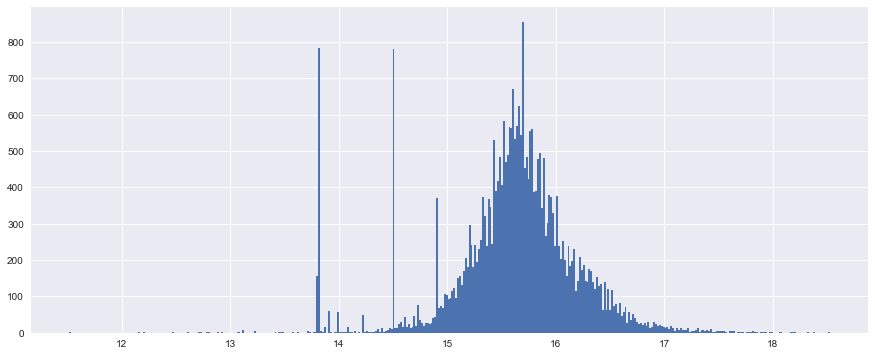

In [54]:
plt.figure(figsize=(15, 6))
np.log(train.price_doc[train.fake_price == 0]).hist(bins = 400)

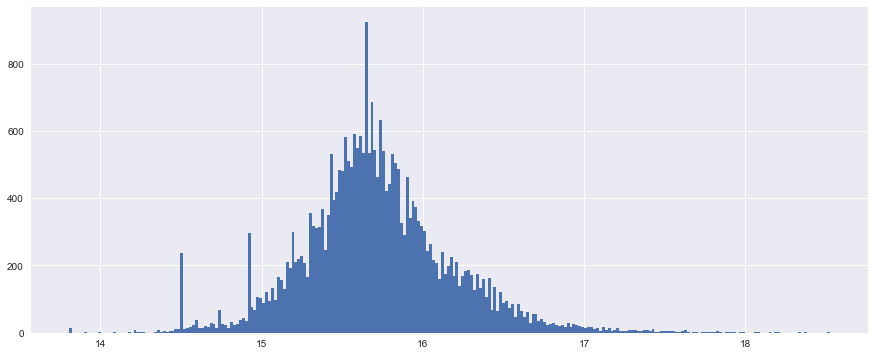

In [80]:
plt.figure(figsize=(15, 6))
np.log(train.price_doc[train.fake_price == 0]).hist(bins = 260)

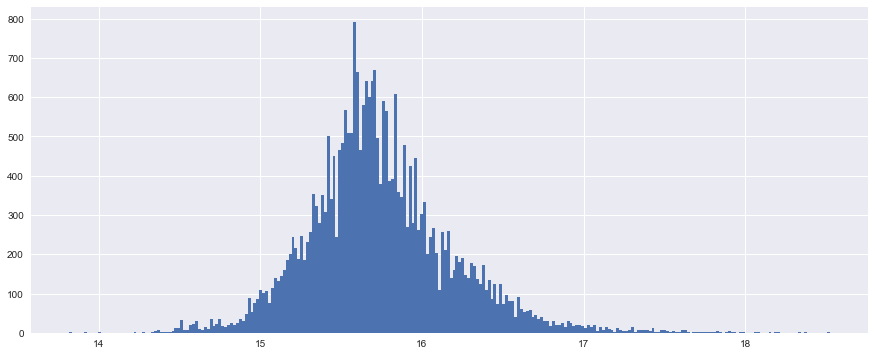

In [46]:
plt.figure(figsize=(15, 6))
np.log(train.price_doc[train.fake_price == 0]).hist(bins = 260)

In [25]:
train.loc[(train.sub_area == 'Molzhaninovskoe'),
          ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,
15711,2014-03-05,75.0,44.0,8.0,3.0,7.0,25.0,2013.0,Molzhaninovskoe,Investment,3.0,1.0,1200000
23756,2014-10-20,57.0,32.0,8.0,2.0,10.0,19.0,2012.0,Molzhaninovskoe,Investment,2.0,1.0,1100000
28431,2015-03-18,72.0,46.0,8.0,3.0,6.0,19.0,2013.0,Molzhaninovskoe,Investment,2.0,1.0,6000000


In [326]:
test.loc[(test.sub_area == 'Molzhaninovskoe'),
          ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']]

,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc
id,,,,,,,,,,,,,
33689,2015-12-15,73.4,44.2,12.4,3,15,25,2012.0,Molzhaninovskoe,Investment,2.0,1,NaN


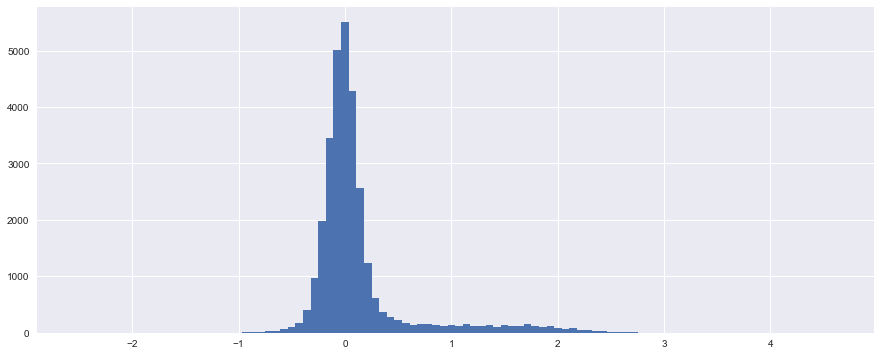

In [12]:
exp_price_err = train.exp_price/train.price_doc
plt.figure(figsize=(15, 6))
np.log(exp_price_err[train.fake_price == 0]).hist(bins = 100)
plt.show()

In [27]:
train.loc[exp_price_err[exp_price_err < 0.3].index, ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc', 'exp_price']]

,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc,exp_price
id,,,,,,,,,,,,,,
2121,2012-05-10,55.0,31.0,NaN,NaN,12.0,NaN,NaN,Teplyj Stan,Investment,NaN,NaN,111111112,8.750000e+06
24823,2014-11-17,76.0,43.0,8.0,3.0,10.0,12.0,0.0,Poselenie Rogovskoe,Investment,1.0,1.0,13400000,3.385238e+06
28431,2015-03-18,72.0,46.0,8.0,3.0,6.0,19.0,2013.0,Molzhaninovskoe,Investment,2.0,1.0,6000000,1.389474e+06


In [482]:
train.loc[(exp_price_err > 2) & (train.fake_price != 1), ['timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc', 'exp_price']]

,timestamp,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,build_year,sub_area,product_type,state,material,price_doc,exp_price
id,,,,,,,,,,,,,,
40,2011-09-30,33.0,18.0,NaN,NaN,9.0,NaN,NaN,Veshnjaki,Investment,NaN,NaN,2000000,4.620000e+06
46,2011-10-01,42.0,22.0,NaN,NaN,24.0,NaN,NaN,Mitino,Investment,NaN,NaN,2312800,6.331054e+06
64,2011-10-04,39.0,39.0,NaN,NaN,10.0,NaN,NaN,Novogireevo,Investment,NaN,NaN,2080000,6.038710e+06
104,2011-10-13,38.0,34.0,NaN,NaN,3.0,NaN,NaN,Severnoe Medvedkovo,Investment,NaN,NaN,2900000,6.138462e+06
122,2011-10-14,36.0,34.0,NaN,NaN,2.0,NaN,NaN,Lianozovo,Investment,NaN,NaN,2000000,5.501216e+06
139,2011-10-17,51.0,28.0,NaN,NaN,3.0,NaN,NaN,Taganskoe,Investment,NaN,NaN,5000000,1.033077e+07
142,2011-10-18,36.0,17.0,NaN,NaN,10.0,NaN,NaN,Orehovo-Borisovo Severnoe,Investment,NaN,NaN,2000000,5.363204e+06
166,2011-10-20,36.0,19.0,NaN,NaN,11.0,NaN,NaN,Moskvorech'e-Saburovo,Investment,NaN,NaN,2000000,5.750000e+06
216,2011-10-26,45.0,27.0,NaN,NaN,NaN,NaN,NaN,Chertanovo Juzhnoe,Investment,NaN,NaN,2825000,6.988235e+06


In [60]:
train.loc[exp_price_err > 1.8, 'fake_price'] = 1

train.loc[(exp_price_err > 1.3) & (train.price_doc == 2000000) , 'fake_price'] = 1
train.loc[(exp_price_err > 1.3) & (train.price_doc == 3000000) , 'fake_price'] = 1
train.loc[(exp_price_err > 1.3) & (train.price_doc == 5000000) , 'fake_price'] = 1

train[train.fake_price == 1].shape

(3091, 295)

In [51]:
train[(train.fake_price == 0) & (train.price_doc > 5900000) & (train.price_doc < 6100000)].price_doc.value_counts()

6000000    361
5950000     79
6050000     53
5903808     24
6087300     21
5959680      9
6088302      6
6085800      6
5970000      6
5905900      5
5990000      5
6080000      5
6036800      5
5980000      4
6030000      4
5909900      4
5944257      4
5922450      3
5975200      3
6056000      3
6064634      3
5967500      3
5929000      3
6012273      3
5936700      3
6099240      2
5984000      2
5998300      2
6070000      2
6083754      2
5941056      2
5989750      2
6095200      2
5942680      2
6090000      2
6065468      2
5960000      2
6008800      2
6075000      2
6091200      2
6014500      2
6051400      2
6066200      2
5942884      2
6008354      2
5997000      2
6060000      2
5920000      2
5934880      2
5966828      2
5976504      2
6058607      2
6028200      2
5995440      2
5974506      1
5913055      1
6085035      1
6057462      1
5928300      1
6060407      1
5942622      1
5973503      1
6016349      1
5911004      1
5957135      1
5979921      1
5970431   

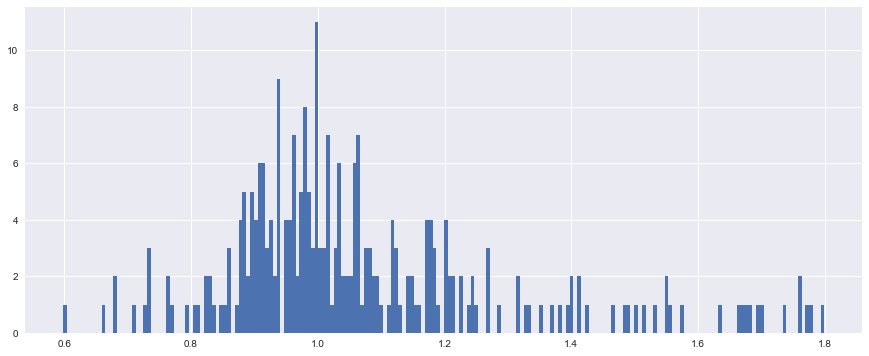

In [59]:
plt.figure(figsize=(15, 6))
exp_price_err[(train.fake_price == 0) & (train.price_doc == 5000000)].hist(bins = 200)

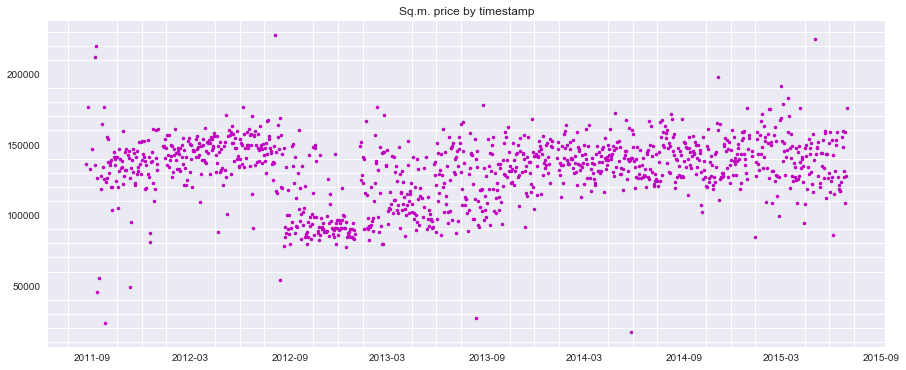

In [318]:
train['sqm_price'] = train['price_doc']/train['full_sq']
sqm_by_ts = train[train.full_sq != 0].groupby(by = 'timestamp', as_index = False)['sqm_price'].median()
sqm_by_ts.timestamp = pd.to_datetime(sqm_by_ts.timestamp)

plt.figure(figsize =(15,6))
plt.plot(sqm_by_ts.timestamp, sqm_by_ts.sqm_price, 'm.')    
plt.title('Sq.m. price by timestamp')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

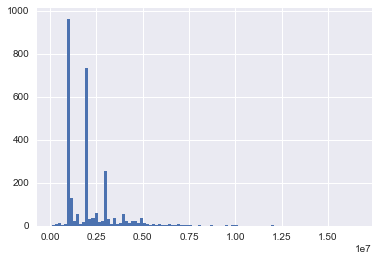

In [31]:
train[train.fake_price == 1].price_doc.hist(bins = 100)

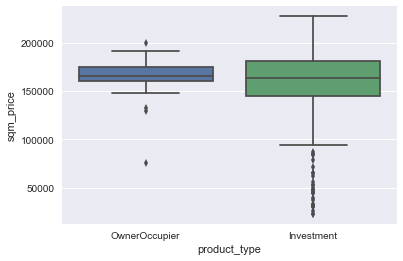

In [473]:
import seaborn
bplot = seaborn.boxplot(x = 'product_type', y = 'sqm_price', data = train.loc[(train.sub_area == "Chertanovo Severnoe")],
                       order=["OwnerOccupier", "Investment"])

In [335]:
train.sub_area.value_counts()

Poselenie Sosenskoe               1827
Nekrasovka                        1733
Poselenie Vnukovskoe              1415
Poselenie Moskovskij               968
Poselenie Voskresenskoe            744
Mitino                             680
Poselenie Filimonkovskoe           551
Krjukovo                           525
Mar'ino                            508
Poselenie Shherbinka               477
Juzhnoe Butovo                     452
Solncevo                           421
Zapadnoe Degunino                  410
Poselenie Desjonovskoe             402
Otradnoe                           358
Nagatinskij Zaton                  327
Bogorodskoe                        305
Nagornoe                           305
Strogino                           301
Izmajlovo                          300
Tekstil'shhiki                     298
Ljublino                           297
Gol'janovo                         295
Severnoe Tushino                   282
Chertanovo Juzhnoe                 273
Birjulevo Vostochnoe     

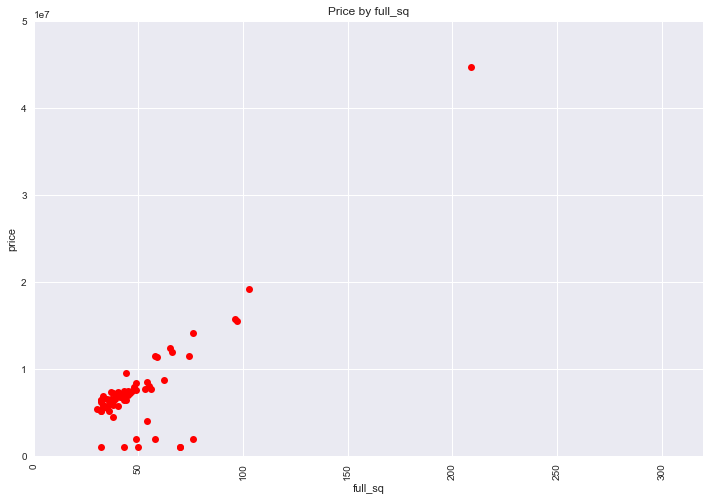

In [361]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
#by_price = train.groupby('full_sq')[['full_sq', 'price_doc']].median()
plt.plot(train.loc[train['sub_area'] == 'Rostokino', ['full_sq']],
         train.loc[train['sub_area'] == 'Rostokino', ['price_doc']], 'ro')
plt.axis([0, 320, 0, 50000000])
ax.set(title='Price by full_sq', xlabel='full_sq', ylabel='price')

In [297]:
train.loc[train['price_doc'] <= 900000, ['full_sq', 'sub_area', 'num_room', 'build_year', 'max_floor', 'price_doc']]

,full_sq,sub_area,num_room,build_year,max_floor,price_doc
id,,,,,,
97,30,Juzhnoe Tushino,NaN,NaN,NaN,500000
217,60,Obruchevskoe,NaN,NaN,NaN,360000
353,27,Kon'kovo,NaN,NaN,NaN,900000
365,76,Horoshevo-Mnevniki,NaN,NaN,NaN,700000
602,37,Nekrasovka,NaN,NaN,NaN,779396
635,70,Matushkino,NaN,NaN,NaN,340000
640,44,Kotlovka,NaN,NaN,NaN,900000
744,37,Tekstil'shhiki,NaN,NaN,NaN,500000
855,80,Nekrasovka,NaN,NaN,NaN,472249


In [49]:
ind = train[(train['price_doc'] == 111111112)].index
train.drop(ind, inplace = True)
y_train.drop(ind, inplace = True)

In [357]:
#удаляем слишком маленькие значения
ind_min = train[(train['price_doc'] <= 900000)].index
train.drop(ind_min, inplace = True)
y_train.drop(ind_min, inplace = True)

### build_year - checked

In [65]:
train.loc[train['build_year'] == 0, 'build_year'] = np.NaN
train.loc[train['build_year'] == 1, 'build_year'] = np.NaN
test.loc[test['build_year'] == 0, 'build_year'] = np.NaN
test.loc[test['build_year'] == 1, 'build_year'] = np.NaN

In [115]:
train.loc[train['build_year'] == 215, 'build_year'] = 2015
train.loc[train['build_year'] == 71, 'build_year'] = np.NaN
train.loc[train['build_year'] == 4965, 'build_year'] = 1965
train.loc[train['build_year'] == 20052009, 'build_year'] = 2007
train.loc[train['build_year'] == 1691, 'build_year'] = 1961
test.loc[test['build_year'] == 215, 'build_year'] = 2015
train.loc[train['build_year'] == 3, 'build_year'] = np.NaN
train.loc[train['build_year'] == 20, 'build_year'] = np.NaN
test.loc[test['build_year'] == 2, 'build_year'] = np.NaN
train.loc[(train['build_year'] == 1860) & (train.sub_area == "Kuz'minki"),'build_year'] = 1960
train.loc[(train['build_year'] == 1910) & (train.sub_area == "Kotlovka"),'build_year'] = 1970

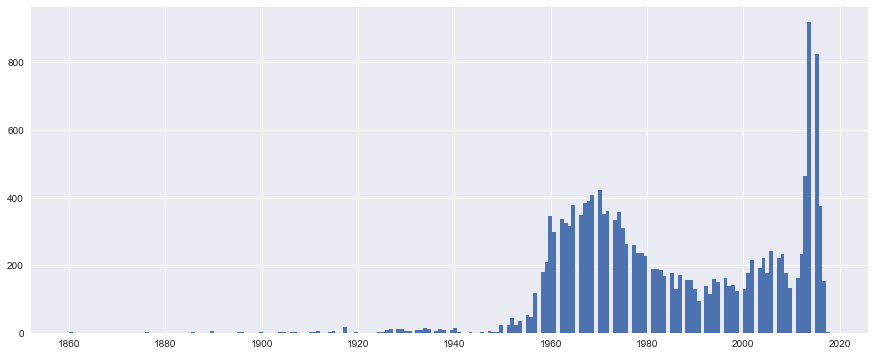

In [175]:
plt.figure(figsize=(15, 6))
train.build_year.hist(bins = 200)

### num_room

In [334]:
train.loc[train['num_room'] == 0, 'num_room'] = np.NaN
test.loc[test['num_room'] == 0, 'num_room'] = np.NaN

In [282]:
print train.num_room.value_counts()
print test.num_room.value_counts()


2.0     8132
1.0     7602
3.0     4675
4.0      418
5.0       40
0.0       14
6.0        9
8.0        3
10.0       2
7.0        1
19.0       1
9.0        1
17.0       1
Name: num_room, dtype: int64
2     3097
1     2855
3     1554
4      133
5       19
7        2
19       1
6        1
Name: num_room, dtype: int64


In [296]:
train.loc[train['num_room'] > 5, ['id', 'timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 'sub_area', 'build_year', 'max_floor', 'floor',
          'product_type', 'price_doc']]

,id,timestamp,full_sq,life_sq,kitch_sq,num_room,sub_area,build_year,max_floor,floor,product_type,price_doc
id,,,,,,,,,,,,
10079,10079,2013-08-26,106,NaN,0.0,6.0,Poselenie Pervomajskoe,2014.0,2.0,2.0,OwnerOccupier,4980000
11624,11624,2013-10-28,40,19.0,7.0,19.0,Poselenie Vnukovskoe,2011.0,17.0,17.0,Investment,2630000
13245,13245,2013-12-19,170,123.0,14.0,6.0,Basmannoe,NaN,4.0,4.0,Investment,34800000
15148,15148,2014-02-18,215,134.0,7.0,6.0,Savelki,2003.0,10.0,10.0,Investment,23000000
16746,16746,2014-03-31,303,NaN,0.0,6.0,Obruchevskoe,NaN,32.0,32.0,OwnerOccupier,54212936
17767,17767,2014-04-23,58,34.0,10.0,10.0,Krjukovo,1992.0,2.0,1.0,Investment,6000000
18936,18936,2014-05-27,177,119.0,17.0,8.0,Basmannoe,1890.0,4.0,3.0,Investment,24267600
18993,18993,2014-05-28,145,109.0,9.0,7.0,Tverskoe,1936.0,6.0,5.0,Investment,25500000
19393,19393,2014-06-05,57,37.0,6.0,6.0,Vyhino-Zhulebino,1969.0,9.0,7.0,Investment,8000000


In [62]:
train.loc[train['num_room'] == 10, 'num_room'] = 1
train.loc[train['num_room'] == 17, 'num_room'] = 1
train.loc[train['num_room'] == 19, 'num_room'] = 1
test.loc[test['num_room'] == 19, 'num_room'] = 1

### floor - checked

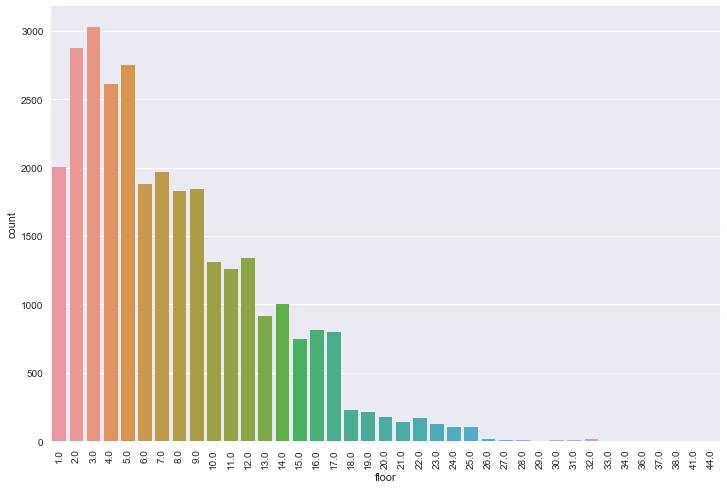

In [259]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.countplot(x=train['floor'])

In [258]:
# 0 заменяем на NaN
train.loc[train['floor'] == 0, 'floor'] = np.NaN
test.loc[test['floor'] == 0, 'floor'] = np.NaN
#
train.loc[train['floor'] == 77, 'floor'] = 7

### max_floor

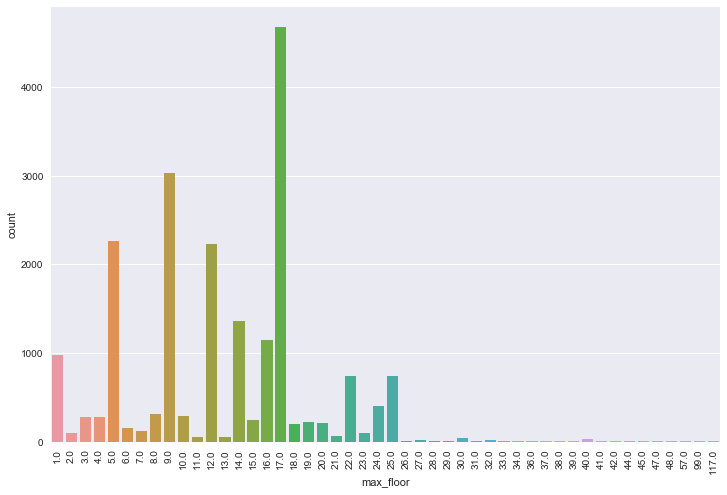

In [261]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.countplot(x=train['max_floor'])

In [277]:
train.loc[(train['max_floor'] == train['floor']) & (train.floor == 1),
         ['id', 'timestamp', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
                    'floor', 'max_floor', 'build_year', 'sub_area', 'product_type', 'state', 'material', 'price_doc']].sub_area.value_counts()

Nekrasovka                   16
Poselenie Voskresenskoe      11
Poselenie Filimonkovskoe      8
Poselenie Novofedorovskoe     6
Krjukovo                      5
Poselenie Rogovskoe           5
Poselenie Moskovskij          4
Nagornoe                      4
Poselenie Vnukovskoe          4
Poselenie Desjonovskoe        3
Poselenie Pervomajskoe        3
Troickij okrug                3
Zapadnoe Degunino             3
Pokrovskoe Streshnevo         2
Poselenie Krasnopahorskoe     2
Poselenie Shherbinka          2
Tekstil'shhiki                1
Horoshevo-Mnevniki            1
Mitino                        1
Danilovskoe                   1
Poselenie Voronovskoe         1
Brateevo                      1
Strogino                      1
Nagatinskij Zaton             1
Name: sub_area, dtype: int64

In [260]:
# 0 заменяем на NaN
train.loc[train['max_floor'] == 0, 'max_floor'] = np.NaN
test.loc[test['max_floor'] == 0, 'max_floor'] = np.NaN
#
train.loc[train['max_floor'] == 117, 'max_floor'] = np.NaN
train.loc[train['max_floor'] == 99, 'max_floor'] = np.NaN

In [55]:
#max_floor не должна быть меньше floor, смотрим, где это не выполняется
train.loc[(train['max_floor'] < train['floor']) & (train['max_floor'] != 0) & (train['max_floor'] != 1),          
          ['floor', 'max_floor', 'sub_area', 'price_doc']]

,floor,max_floor,sub_area,price_doc
9161,8.0,3.0,Tverskoe,24435000
12148,20.0,17.0,Jakimanka,5219608
12315,11.0,2.0,Timirjazevskoe,8300000
12724,5.0,3.0,Kuncevo,8700000
12870,12.0,11.0,Bibirevo,8500000
13322,17.0,2.0,Moskvorech'e-Saburovo,11000000
13381,14.0,10.0,Mar'ino,12200000
14061,5.0,4.0,Nagatinskij Zaton,7400000
14630,12.0,9.0,Caricyno,5200000
15508,12.0,2.0,Poselenie Moskovskij,5566016


In [56]:
test.loc[(test['max_floor'] < test['floor']) & (test['max_floor'] != 0) & (test['max_floor'] != 1),          
          ['floor', 'max_floor', 'sub_area']]

,floor,max_floor,sub_area
383,12,7,Poselenie Filimonkovskoe
994,8,5,Arbat
1330,5,3,Losinoostrovskoe
1544,9,5,Ljublino
1839,17,10,Juzhnoe Butovo
2470,20,15,Poselenie Desjonovskoe
2739,5,3,Perovo
3375,10,3,Mozhajskoe
3690,25,10,Poselenie Shherbinka
3715,6,5,Kurkino


In [ ]:
#
var1 = train.loc[train['max_floor'] < train['floor'], ['floor']]
var2 = train.loc[train['max_floor'] < train['floor'], ['max_floor']]
train.loc[train['max_floor'] < train['floor'], ['floor']] = var2
train.loc[train['max_floor'] < train['floor'], ['max_floor']] = var1
#
var3 = test.loc[test['max_floor'] < test['floor'], ['floor']]
var4 = test.loc[test['max_floor'] < test['floor'], ['max_floor']]
test.loc[test['max_floor'] < test['floor'], ['floor']] = var4
test.loc[test['max_floor'] < test['floor'], ['max_floor']] = var3
# оставшиеся 1 заменяем на NaN
train.loc[train['max_floor'] == 1, 'max_floor'] = np.NaN
test.loc[test['max_floor'] == 1, 'max_floor'] = np.NaN

Исследуем корреляции между признаками:

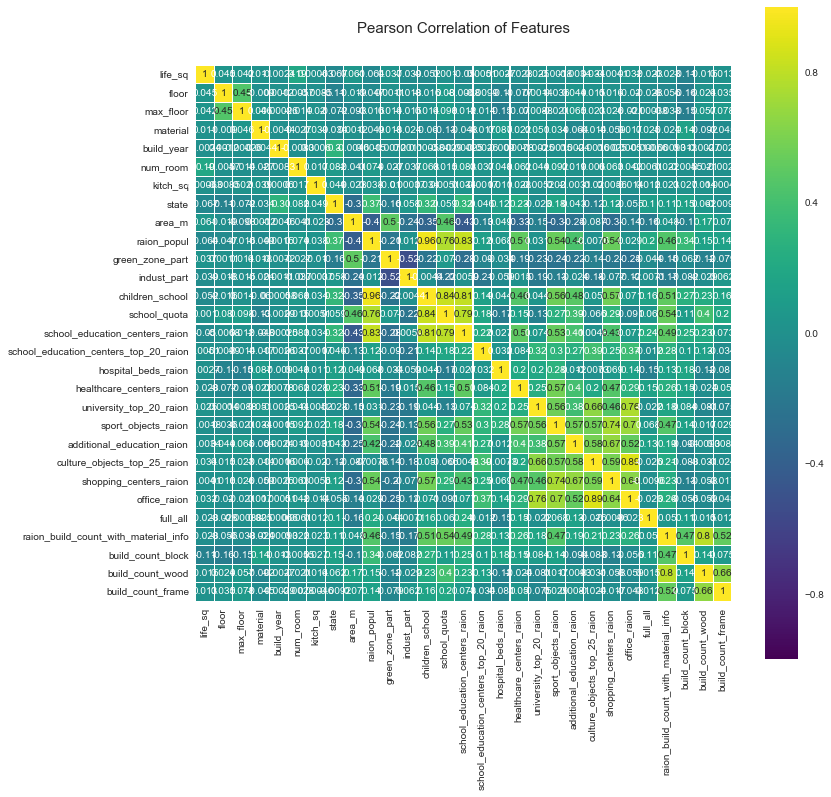

In [157]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cut_train[cut_train.columns[cut_train.dtypes != object][1:30]].astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Проделываем то же самое для файла MACRO:

In [ ]:
macro = pd.read_csv('macro.csv', header = 0, sep=',', parse_dates=['timestamp'])
print "macro ", macro.shape

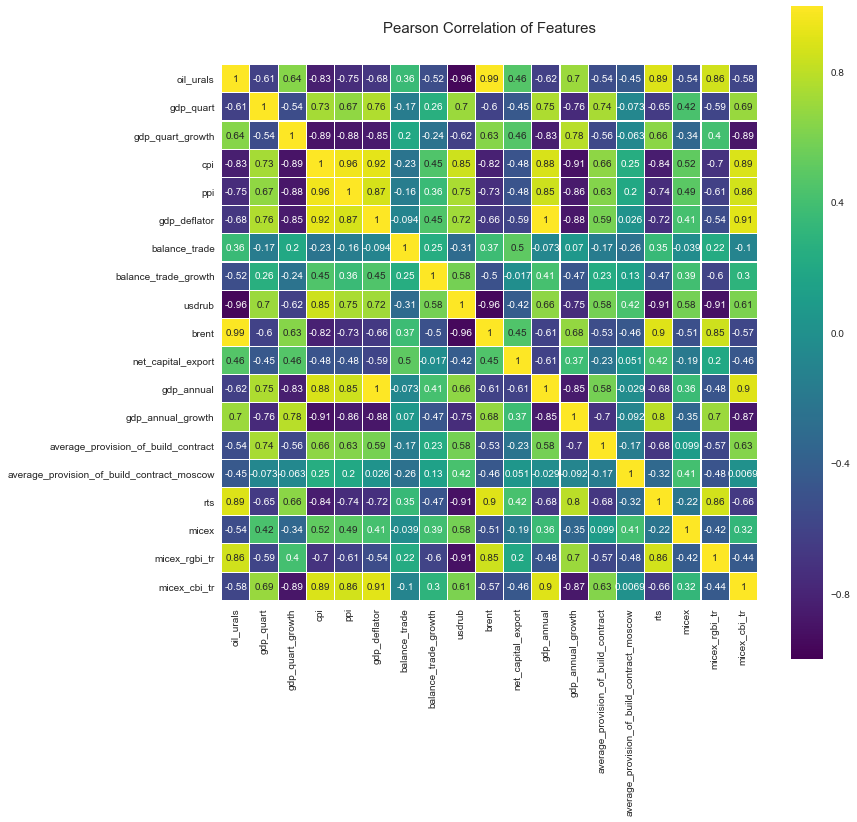

In [162]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cut_macro[cut_macro.columns[1:20]].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True)